# 引入依赖

In [1]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset,random_split,DataLoader
import matplotlib.pyplot as plt

# 超参数

In [2]:
batch_size=1000
lr  = 0.01
epoch_num = 200

# 手动生成回归任务数据集
满足条件
- 训练集样本数: 7000
- 测试集样本数: 3000

In [3]:
random.seed(42)
torch.manual_seed(42)
class LinearDataset(Dataset):
    def __init__(self):
        self.num_sample = 10000
        self.num_features = 500
        self.X = torch.randn(self.num_sample,self.num_features)
        self.true_W = torch.ones(self.num_features,1)
        self.Y = 0.028+torch.matmul(self.X,self.true_W)+0.01*torch.randn(self.num_sample, 1)
    def __len__(self):
        return self.num_sample
    def __getitem__(self, index):
        return self.X[index],self.Y[index]
train_size = 7000
test_size = 10000 - train_size
dataset = LinearDataset()
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
print("训练集样本数:", len(train_dataset))
print("测试集样本数:", len(test_dataset))
train_loader= DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

训练集样本数: 7000
测试集样本数: 3000


# 定义激活函数 定义网络结构 定义网络初始化参数
# 定义损失函数 定义优化器

In [4]:
inputs = 500
hiddens = 256
out = 1

class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(inputs,hiddens)
        self.relu = torch.nn.ReLU()
        self.hidden = torch.nn.Linear(hiddens,out)
    def forward(self,x):
        t = self.linear(x)
        t = self.relu(t)
        t = self.hidden(t)
        return  t
net = Net()
loss =  torch.nn.MSELoss()
sgd = torch.optim.Adam(params=net.parameters(),lr=lr)


# 训练

In [5]:
import time

train_loss =[]
test_loss = []
start_time = time.time()
for epoch in range(epoch_num):
    loss_list=[]
    for x,y in train_loader:
        y_hat = net(x)
        l = loss(y_hat,y)
        sgd.zero_grad()
        l.backward()
        sgd.step()
        loss_list.append(l.item())

    train_mean = np.mean(loss_list)
    train_loss.append(train_mean)
    loss_list=[]
    for x,y in test_loader:
        y_hat = net(x)
        l = loss(y_hat,y)
        # print(l)
        loss_list.append(l.item())
    test_mean = np.mean(loss_list)
    test_loss.append(test_mean)
    print("epoch:",epoch+1,"train_loss",train_mean,"test_loss:",test_mean)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 train_loss 371.77642822265625 test_loss: 117.7508036295573
epoch: 2 train_loss 55.43754114423479 test_loss: 67.47996012369792
epoch: 3 train_loss 35.4861045564924 test_loss: 15.0912504196167
epoch: 4 train_loss 27.204181126185826 test_loss: 13.755029678344727
epoch: 5 train_loss 7.81165565763201 test_loss: 8.558846791585287
epoch: 6 train_loss 6.84157259123666 test_loss: 2.0113327900568643
epoch: 7 train_loss 3.2712444918496266 test_loss: 2.4678534666697183
epoch: 8 train_loss 1.44356997523989 test_loss: 1.2490767637888591
epoch: 9 train_loss 1.023961671761104 test_loss: 0.5393105546633402
epoch: 10 train_loss 0.5704039803573063 test_loss: 0.4445193111896515
epoch: 11 train_loss 0.3055435972554343 test_loss: 0.2844674388567607
epoch: 12 train_loss 0.2135856066431318 test_loss: 0.1940716157356898
epoch: 13 train_loss 0.14033328954662597 test_loss: 0.146505539615949
epoch: 14 train_loss 0.09160542168787547 test_loss: 0.1372076819340388
epoch: 15 train_loss 0.06384707135813576 te

# 模型评估
训练用时 29.37秒
使用Adam优化器和均方误差（MSE）损失函数进行训练。
根据实验结果，我们可以看到随着训练的进行，损失（loss）在每个epoch中都在减小，从初始值约为117.75逐渐减小到约为0.6564。这显示了模型在训练数据上的逐渐优化。

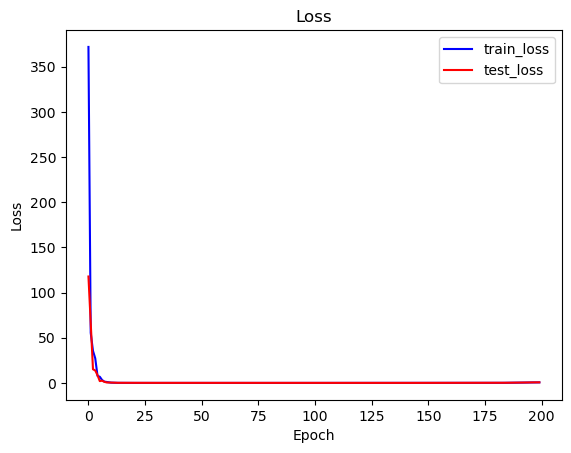

In [7]:

plt.plot(train_loss, 'b-',label="train_loss")
plt.plot(test_loss, 'r-' ,label="test_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()